In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

def calc_score(label, pred):
    # calculate R2, RMSE, MAE, PCC
    r2 = r2_score(label, pred)
    rmse = np.sqrt(mean_squared_error(label, pred))
    mae = mean_absolute_error(label, pred)
    pcc, _ = pearsonr(label, pred)
    return r2, rmse, mae, pcc
def process_collect(collect):
    collect = np.array(collect)
    r2_mean, r2_std = collect[:, 1].mean(), collect[:, 1].std()
    rmse_mean, rmse_std = collect[:, 2].mean(), collect[:, 2].std()
    mae_mean, mae_std = collect[:, 3].mean(), collect[:, 3].std()
    pcc_mean, pcc_std = collect[:, 4].mean(), collect[:, 4].std()
    return r2_mean, r2_std, rmse_mean, rmse_std, mae_mean, mae_std, pcc_mean, pcc_std

def plot_rmse_comparison(base_models, ensemble_models):
    model_names = list(base_models.keys()) + list(ensemble_models.keys())
    data = list(base_models.values()) + list(ensemble_models.values())
    positions = np.arange(1, len(data) + 1)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    bp = ax.boxplot(data, positions=positions, widths=0.6, patch_artist=True, showfliers=False)
    
    for box in bp['boxes']:
        box.set_facecolor('none')
        box.set_edgecolor('black')
    for median in bp['medians']:
        median.set_color('red')
    
    base_colors = ['C0', 'C1', 'C2']
    ensemble_colors = ['C3', 'C4', 'C5', 'C6']
    
    for i, (model, rmse_vals) in enumerate(base_models.items()):
        pos = positions[i]
        jitter = np.random.normal(loc=pos, scale=0.04, size=len(rmse_vals))
        ax.scatter(jitter, rmse_vals, alpha=0.7, color=base_colors[i % len(base_colors)])
    
    base_model_count = len(base_models)
    for j, (model, rmse_vals) in enumerate(ensemble_models.items()):
        pos = positions[base_model_count + j]
        jitter = np.random.normal(loc=pos, scale=0.04, size=len(rmse_vals))
        # use triangle marker for ensemble models
        ax.scatter(jitter, rmse_vals, alpha=0.7, 
                   color=ensemble_colors[j % len(ensemble_colors)], marker='^', s=100)
    
    ax.set_xticks(positions)
    ax.set_xticklabels(model_names, rotation=45, ha='right', fontsize=15)
    ax.set_ylabel('RMSE', fontsize=15)
    ax.set_yticks([19, 21, 23, 25, 27])
    ax.tick_params(axis='y', labelsize=15)
    
    plt.tight_layout()
    plt.show()

# leaderboard result

In [3]:
yaowen = pd.read_csv('data/only_train_set/Tox24_leaderboard_Yaowen.csv')
weijun = pd.read_csv('data/only_train_set/KANO_tox24_leaderboard_Weijun.csv')
xiaolin = pd.read_csv('data/only_train_set/tox24_leaderboader_Xiaolin.csv')

In [4]:
# individual-level results
ggap_collect = []
for i in range(11, 30):
    pred = yaowen['Prediction_GGAP_CPI_{}'.format(i)]
    r2, rmse, mae, pcc = calc_score(yaowen['activity'], pred)
    # print(f'Yaowen: RMSE={rmse:.3f}, PCC={pcc:.3f}, R2={r2:.3f}')
    ggap_collect.append([i, r2, rmse, mae, pcc])
r2_mean, r2_std, rmse_mean, rmse_std, mae_mean, mae_std, pcc_mean, pcc_std = process_collect(ggap_collect)
print(f'GGAP: R2={r2_mean:.3f}±{r2_std:.3f}, RMSE={rmse_mean:.3f}±{rmse_std:.3f}, MAE={mae_mean:.3f}±{mae_std:.3f}, PCC={pcc_mean:.3f}±{pcc_std:.3f}')

kano_collect = []
for col in weijun.columns[2:-1]:
    pred = weijun[col]
    r2, rmse, mae, pcc = calc_score(weijun['TTR binding activity'], pred)
    # print(f'Yaowen: RMSE={rmse:.3f}, PCC={pcc:.3f}, R2={r2:.3f}')
    kano_collect.append([i, r2, rmse, mae, pcc])

for i in range(10):
    pred = yaowen['Prediction_KANO_{}'.format(i)]
    r2, rmse, mae, pcc = calc_score(yaowen['activity'], pred)
    # print(f'Yaowen: RMSE={rmse:.3f}, PCC={pcc:.3f}, R2={r2:.3f}')
    kano_collect.append([i, r2, rmse, mae, pcc])
r2_mean, r2_std, rmse_mean, rmse_std, mae_mean, mae_std, pcc_mean, pcc_std = process_collect(kano_collect)
print(f'KANO: R2={r2_mean:.3f}±{r2_std:.3f}, RMSE={rmse_mean:.3f}±{rmse_std:.3f}, MAE={mae_mean:.3f}±{mae_std:.3f}, PCC={pcc_mean:.3f}±{pcc_std:.3f}')

sphys_collect = []
for i in range(5):
    pred = xiaolin['pred_{}'.format(i)]
    r2, rmse, mae, pcc = calc_score(xiaolin['TTR binding activity'], pred)
    # print(f'Yaowen: RMSE={rmse:.3f}, PCC={pcc:.3f}, R2={r2:.3f}')
    sphys_collect.append([i, r2, rmse, mae, pcc])
r2_mean, r2_std, rmse_mean, rmse_std, mae_mean, mae_std, pcc_mean, pcc_std = process_collect(sphys_collect)
print(f'sPhysNet: R2={r2_mean:.3f}±{r2_std:.3f}, RMSE={rmse_mean:.3f}±{rmse_std:.3f}, MAE={mae_mean:.3f}±{mae_std:.3f}, PCC={pcc_mean:.3f}±{pcc_std:.3f}')

GGAP: R2=0.500±0.035, RMSE=23.451±0.820, MAE=16.922±0.700, PCC=0.714±0.022
KANO: R2=0.515±0.047, RMSE=23.073±1.096, MAE=16.774±0.761, PCC=0.728±0.023
sPhysNet: R2=0.483±0.040, RMSE=23.841±0.911, MAE=16.859±0.719, PCC=0.712±0.022


In [6]:
# ensemble-level results
kano_ggap = np.hstack((yaowen.iloc[:, 13:].values, weijun.iloc[:, 2:-1].values))
kano_ggap = np.mean(kano_ggap, axis=1)
r2, rmse, mae, pcc = calc_score(yaowen['activity'], kano_ggap)
print(f'KANO+GGAP: R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}, PCC={pcc:.3f}')

kano_sphys = np.hstack((weijun.iloc[:, 2:-1].values, xiaolin.iloc[:, 3:].values))
kano_sphys = np.mean(kano_sphys, axis=1)
r2, rmse, mae, pcc = calc_score(yaowen['activity'], kano_sphys)
print(f'KANO+sPhysNet: R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}, PCC={pcc:.3f}')

ggap_sphys = np.hstack((yaowen.iloc[:, 13:].values, xiaolin.iloc[:, 3:].values))
ggap_sphys = np.mean(ggap_sphys, axis=1)
r2, rmse, mae, pcc = calc_score(yaowen['activity'], ggap_sphys)
print(f'GGAP+sPhysNet: R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}, PCC={pcc:.3f}')

kano_ggap_sphys = np.hstack((yaowen.iloc[:, 13:].values, weijun.iloc[:, 2:-1].values, xiaolin.iloc[:, 3:].values))
kano_ggap_sphys = np.mean(kano_ggap_sphys, axis=1)
r2, rmse, mae, pcc = calc_score(yaowen['activity'], kano_ggap_sphys)
print(f'Consensus: R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}, PCC={pcc:.3f}')

KANO+GGAP: R2=0.602, RMSE=20.923, MAE=15.258, PCC=0.777
KANO+sPhysNet: R2=0.599, RMSE=20.999, MAE=15.086, PCC=0.775
GGAP+sPhysNet: R2=0.596, RMSE=21.098, MAE=15.275, PCC=0.773
Consensus: R2=0.608, RMSE=20.781, MAE=15.067, PCC=0.781


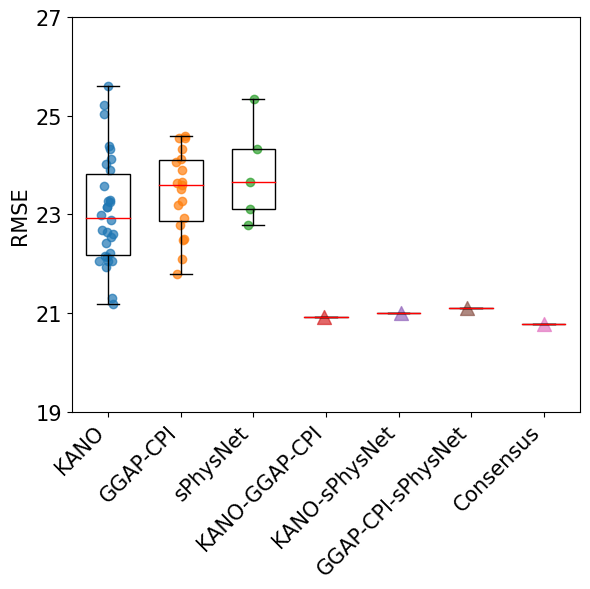

In [7]:
base_models = {
    'KANO': [x[2] for x in kano_collect],
    'GGAP-CPI': [x[2] for x in ggap_collect],
    'sPhysNet': [x[2] for x in sphys_collect]
}
_, kano_ggap_rmse, _, _ = calc_score(yaowen['activity'], kano_ggap)
_, kano_sphys_rmse, _, _ = calc_score(yaowen['activity'], kano_sphys)
_, ggap_sphys_rmse, _, _ = calc_score(yaowen['activity'], ggap_sphys)
_, kano_ggap_sphys_rmse, _, _ = calc_score(yaowen['activity'], kano_ggap_sphys)
ensemble_models = {
    'KANO-GGAP-CPI': [kano_ggap_rmse],
    'KANO-sPhysNet': [kano_sphys_rmse],
    'GGAP-CPI-sPhysNet': [ggap_sphys_rmse],
    'Consensus': [kano_ggap_sphys_rmse]
}
plot_rmse_comparison(base_models, ensemble_models)

# test result (only use train data for model training)

In [8]:
yaowen = pd.read_csv('data/only_train_set/Tox24_test_Yaowen.csv')
weijun = pd.read_csv('data/only_train_set/tox24_test_Weijun.csv')
xiaolin = pd.read_csv('data/only_train_set/tox24_test_Xiaolin.csv')

In [9]:
# individual-level results
ggap_collect = []
for i in range(11, 30):
    pred = yaowen['Prediction_GGAP_CPI_{}'.format(i)]
    r2, rmse, mae, pcc = calc_score(yaowen['activity'], pred)
    # print(f'Yaowen: RMSE={rmse:.3f}, PCC={pcc:.3f}, R2={r2:.3f}')
    ggap_collect.append([i, r2, rmse, mae, pcc])
r2_mean, r2_std, rmse_mean, rmse_std, mae_mean, mae_std, pcc_mean, pcc_std = process_collect(ggap_collect)
print(f'GGAP: R2={r2_mean:.3f}±{r2_std:.3f}, RMSE={rmse_mean:.3f}±{rmse_std:.3f}, MAE={mae_mean:.3f}±{mae_std:.3f}, PCC={pcc_mean:.3f}±{pcc_std:.3f}')

kano_collect = []
for col in weijun.columns[3:-1]:
    pred = weijun[col]
    r2, rmse, mae, pcc = calc_score(weijun['TTR binding activity'], pred)
    # print(f'Yaowen: RMSE={rmse:.3f}, PCC={pcc:.3f}, R2={r2:.3f}')
    kano_collect.append([i, r2, rmse, mae, pcc])

for i in range(10):
    pred = yaowen['Prediction_KANO_{}'.format(i)]
    r2, rmse, mae, pcc = calc_score(yaowen['activity'], pred)
    # print(f'Yaowen: RMSE={rmse:.3f}, PCC={pcc:.3f}, R2={r2:.3f}')
    kano_collect.append([i, r2, rmse, mae, pcc])
r2_mean, r2_std, rmse_mean, rmse_std, mae_mean, mae_std, pcc_mean, pcc_std = process_collect(kano_collect)
print(f'KANO: R2={r2_mean:.3f}±{r2_std:.3f}, RMSE={rmse_mean:.3f}±{rmse_std:.3f}, MAE={mae_mean:.3f}±{mae_std:.3f}, PCC={pcc_mean:.3f}±{pcc_std:.3f}')

# NOTE: sPhysNet is unable to predict toxicity for 211-indexed compound
xiaolin_temp = xiaolin.drop(211)
sphys_collect = []
for i in range(5):
    pred = xiaolin_temp['pred_{}'.format(i)]
    r2, rmse, mae, pcc = calc_score(xiaolin_temp['TTR binding activity'], pred)
    # print(f'Yaowen: RMSE={rmse:.3f}, PCC={pcc:.3f}, R2={r2:.3f}')
    sphys_collect.append([i, r2, rmse, mae, pcc])
r2_mean, r2_std, rmse_mean, rmse_std, mae_mean, mae_std, pcc_mean, pcc_std = process_collect(sphys_collect)
print(f'sPhysNet: R2={r2_mean:.3f}±{r2_std:.3f}, RMSE={rmse_mean:.3f}±{rmse_std:.3f}, MAE={mae_mean:.3f}±{mae_std:.3f}, PCC={pcc_mean:.3f}±{pcc_std:.3f}')

GGAP: R2=0.566±0.040, RMSE=23.545±1.081, MAE=17.112±0.756, PCC=0.760±0.024
KANO: R2=0.589±0.019, RMSE=22.938±0.539, MAE=17.344±0.410, PCC=0.773±0.011
sPhysNet: R2=0.507±0.026, RMSE=25.064±0.658, MAE=18.691±0.481, PCC=0.729±0.018


In [10]:
# ensemble-level results
kano_ggap = np.hstack((yaowen.iloc[:, 3:].values, weijun.iloc[:, 3:-1].values))
kano_ggap = np.mean(kano_ggap, axis=1)
r2, rmse, mae, pcc = calc_score(yaowen['activity'], kano_ggap)
print(f'KANO+GGAP: R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}, PCC={pcc:.3f}')

kano_sphys = np.hstack((weijun.iloc[:, 3:-1].values, xiaolin.iloc[:, 3:].values))
kano_sphys = np.nanmean(kano_sphys, axis=1)
r2, rmse, mae, pcc = calc_score(yaowen['activity'], kano_sphys)
print(f'KANO+sPhysNet: R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}, PCC={pcc:.3f}')

ggap_sphys = np.hstack((yaowen.iloc[:, 13:].values, xiaolin.iloc[:, 3:].values))
ggap_sphys = np.nanmean(ggap_sphys, axis=1)
r2, rmse, mae, pcc = calc_score(yaowen['activity'], ggap_sphys)
print(f'GGAP+sPhysNet: R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}, PCC={pcc:.3f}')

kano_ggap_sphys = np.hstack((yaowen.iloc[:, 3:].values, weijun.iloc[:, 3:-1].values, xiaolin.iloc[:, 3:].values))
kano_ggap_sphys = np.nanmean(kano_ggap_sphys, axis=1)
r2, rmse, mae, pcc = calc_score(yaowen['activity'], kano_ggap_sphys)
print(f'Consensus: R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}, PCC={pcc:.3f}')

KANO+GGAP: R2=0.663, RMSE=20.772, MAE=15.363, PCC=0.816
KANO+sPhysNet: R2=0.648, RMSE=21.232, MAE=16.029, PCC=0.808
GGAP+sPhysNet: R2=0.644, RMSE=21.337, MAE=15.446, PCC=0.807
Consensus: R2=0.665, RMSE=20.704, MAE=15.292, PCC=0.818


In [11]:
# NOTE: this is for blind test result (online submission)
kano_mean = np.nanmean(np.hstack((yaowen.iloc[:, 3:10].values, weijun.iloc[:, 3:-1].values)), axis=1)
ggap_mean = np.nanmean(yaowen.iloc[:, 13:].values, axis=1)
sphys_mean = np.nanmean(xiaolin.iloc[:, 3:].values, axis=1)
ensemble = np.nanmean(np.vstack([kano_mean, ggap_mean, sphys_mean]), axis=0)
r2, rmse, mae, pcc = calc_score(yaowen['activity'], ensemble)
print(f'Consensus: R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}, PCC={pcc:.3f}')

Consensus: R2=0.660, RMSE=20.851, MAE=15.491, PCC=0.818


C:\Users\Administrator\AppData\Local\Temp\ipykernel_44224\2688799117.py:4: RuntimeWarning: Mean of empty slice
  sphys_mean = np.nanmean(xiaolin.iloc[:, 3:].values, axis=1)


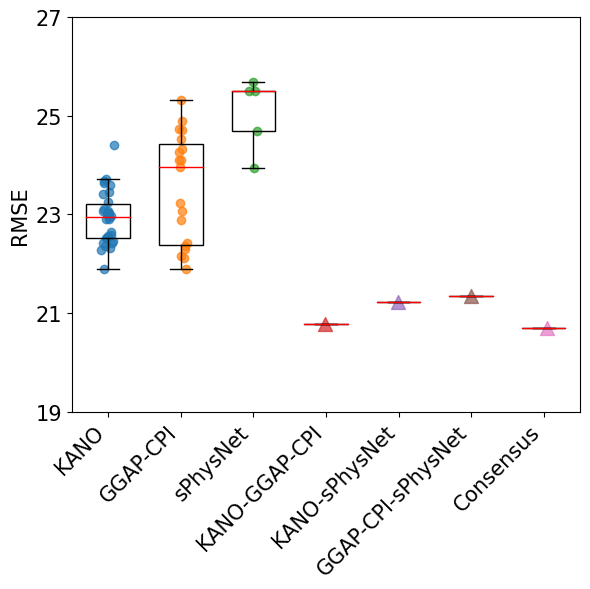

In [12]:
base_models = {
    'KANO': [x[2] for x in kano_collect],
    'GGAP-CPI': [x[2] for x in ggap_collect],
    'sPhysNet': [x[2] for x in sphys_collect]
}
_, kano_ggap_rmse, _, _ = calc_score(yaowen['activity'], kano_ggap)
_, kano_sphys_rmse, _, _ = calc_score(yaowen['activity'], kano_sphys)
_, ggap_sphys_rmse, _, _ = calc_score(yaowen['activity'], ggap_sphys)
_, kano_ggap_sphys_rmse, _, _ = calc_score(yaowen['activity'], kano_ggap_sphys)
ensemble_models = {
    'KANO-GGAP-CPI': [kano_ggap_rmse],
    'KANO-sPhysNet': [kano_sphys_rmse],
    'GGAP-CPI-sPhysNet': [ggap_sphys_rmse],
    'Consensus': [kano_ggap_sphys_rmse]
}
plot_rmse_comparison(base_models, ensemble_models)

# test result (combine leaderboard data and train data for model training)
### this is an offline 5×5-fold cross-validation reproduction for all base models and consensus models

In [13]:
yaowen = pd.read_csv('data/Tox24_test_yaowen_single.csv')
weijun = pd.read_csv('data/Tox24_test_weijun_single.csv')
xiaolin = pd.read_csv('data/Tox24_test_xiaolin_single.csv')

In [14]:
# individual-level results
ggap_collect = []
for i in range(5):
    for j in range(5):
        pred = yaowen['Prediction_{}_{}'.format(i, j)]
        r2, rmse, mae, pcc = calc_score(yaowen['y'], pred)
        # print(f'Yaowen: RMSE={rmse:.3f}, PCC={pcc:.3f}, R2={r2:.3f}')
        ggap_collect.append([i, r2, rmse, mae, pcc])
r2_mean, r2_std, rmse_mean, rmse_std, mae_mean, mae_std, pcc_mean, pcc_std = process_collect(ggap_collect)
print(f'GGAP: R2={r2_mean:.3f}±{r2_std:.3f}, RMSE={rmse_mean:.3f}±{rmse_std:.3f}, MAE={mae_mean:.3f}±{mae_std:.3f}, PCC={pcc_mean:.3f}±{pcc_std:.3f}')

kano_collect = []
for i in range(5):
    for j in range(5):
        pred = weijun['Prediction_{}_{}'.format(i, j)]
        r2, rmse, mae, pcc = calc_score(yaowen['y'], pred)
        # print(f'Yaowen: RMSE={rmse:.3f}, PCC={pcc:.3f}, R2={r2:.3f}')
        kano_collect.append([i, r2, rmse, mae, pcc])
r2_mean, r2_std, rmse_mean, rmse_std, mae_mean, mae_std, pcc_mean, pcc_std = process_collect(kano_collect)
print(f'KANO: R2={r2_mean:.3f}±{r2_std:.3f}, RMSE={rmse_mean:.3f}±{rmse_std:.3f}, MAE={mae_mean:.3f}±{mae_std:.3f}, PCC={pcc_mean:.3f}±{pcc_std:.3f}')

sphys_collect = []
for i in range(5):
    for j in range(5):
        pred = xiaolin['Prediction_{}_{}'.format(i, j)]
        r2, rmse, mae, pcc = calc_score(xiaolin['TTR binding activity'], pred)
        # print(f'Yaowen: RMSE={rmse:.3f}, PCC={pcc:.3f}, R2={r2:.3f}')
        sphys_collect.append([i, r2, rmse, mae, pcc])
r2_mean, r2_std, rmse_mean, rmse_std, mae_mean, mae_std, pcc_mean, pcc_std = process_collect(sphys_collect)
print(f'sPhysNet: R2={r2_mean:.3f}±{r2_std:.3f}, RMSE={rmse_mean:.3f}±{rmse_std:.3f}, MAE={mae_mean:.3f}±{mae_std:.3f}, PCC={pcc_mean:.3f}±{pcc_std:.3f}')

ggap_collect_, kano_collect_, sphys_collect_ = ggap_collect, kano_collect, sphys_collect

GGAP: R2=0.582±0.023, RMSE=23.128±0.638, MAE=16.799±0.499, PCC=0.770±0.013
KANO: R2=0.596±0.021, RMSE=22.727±0.587, MAE=17.145±0.502, PCC=0.776±0.012
sPhysNet: R2=0.574±0.025, RMSE=23.338±0.684, MAE=17.375±0.603, PCC=0.765±0.012


In [15]:
# cross validation-level results (we will have 5 results for each model)
# set 211-indexed data in xiaolin to the average of other two
xiaolin.loc[211, [f'Prediction_{i}_{j}' for i in range(5) for j in range(5)]] = (yaowen.loc[211, [f'Prediction_{i}_{j}' for i in range(5) for j in range(5)]].values + weijun.loc[211, [f'Prediction_{i}_{j}' for i in range(5) for j in range(5)]].values) / 2
label = xiaolin['TTR binding activity'].values

ggap_collect, kano_collect, sphys_collect = [], [], []
kano_ggap_collect, kano_sphys_collect, ggap_sphys_collect, kano_ggap_sphys_collect = [], [], [], []
for split in range(5):
    ggap = yaowen[[f'Prediction_{i}_{split}' for i in range(5)]].values
    kano = weijun[[f'Prediction_{split}_{i}' for i in range(5)]].values
    sphysnet = xiaolin[[f'Prediction_{split}_{i}' for i in range(5)]].values
    ggap_kano = np.nanmean(np.hstack((ggap, kano)), axis=1)
    ggap_sphys = np.nanmean(np.hstack((ggap, sphysnet)), axis=1)
    kano_sphys = np.nanmean(np.hstack((kano, sphysnet)), axis=1)
    kano_ggap_sphys = np.nanmean(np.hstack((ggap, kano, sphysnet)), axis=1)

    r2, rmse, mae, pcc = calc_score(label, np.mean(ggap, axis=1))
    ggap_collect.append([split, r2, rmse, mae, pcc])
    r2, rmse, mae, pcc = calc_score(label, np.mean(kano, axis=1))
    kano_collect.append([split, r2, rmse, mae, pcc])
    r2, rmse, mae, pcc = calc_score(label, np.mean(sphysnet, axis=1))
    sphys_collect.append([split, r2, rmse, mae, pcc])
    r2, rmse, mae, pcc = calc_score(label, ggap_kano)
    kano_ggap_collect.append([split, r2, rmse, mae, pcc])
    r2, rmse, mae, pcc = calc_score(label, kano_sphys)
    kano_sphys_collect.append([split, r2, rmse, mae, pcc])
    r2, rmse, mae, pcc = calc_score(label, ggap_sphys)
    ggap_sphys_collect.append([split, r2, rmse, mae, pcc])
    r2, rmse, mae, pcc = calc_score(label, kano_ggap_sphys)
    kano_ggap_sphys_collect.append([split, r2, rmse, mae, pcc])

r2_mean, r2_std, rmse_mean, rmse_std, mae_mean, mae_std, pcc_mean, pcc_std = process_collect(ggap_collect)
print(f'GGAP: R2={r2_mean:.3f}±{r2_std:.3f}, RMSE={rmse_mean:.3f}±{rmse_std:.3f}, MAE={mae_mean:.3f}±{mae_std:.3f}, PCC={pcc_mean:.3f}±{pcc_std:.3f}')
r2_mean, r2_std, rmse_mean, rmse_std, mae_mean, mae_std, pcc_mean, pcc_std = process_collect(kano_collect)
print(f'KANO: R2={r2_mean:.3f}±{r2_std:.3f}, RMSE={rmse_mean:.3f}±{rmse_std:.3f}, MAE={mae_mean:.3f}±{mae_std:.3f}, PCC={pcc_mean:.3f}±{pcc_std:.3f}')
r2_mean, r2_std, rmse_mean, rmse_std, mae_mean, mae_std, pcc_mean, pcc_std = process_collect(sphys_collect)
print(f'sPhysNet: R2={r2_mean:.3f}±{r2_std:.3f}, RMSE={rmse_mean:.3f}±{rmse_std:.3f}, MAE={mae_mean:.3f}±{mae_std:.3f}, PCC={pcc_mean:.3f}±{pcc_std:.3f}')
r2_mean, r2_std, rmse_mean, rmse_std, mae_mean, mae_std, pcc_mean, pcc_std = process_collect(kano_ggap_collect)
print(f'KANO+GGAP: R2={r2_mean:.3f}±{r2_std:.3f}, RMSE={rmse_mean:.3f}±{rmse_std:.3f}, MAE={mae_mean:.3f}±{mae_std:.3f}, PCC={pcc_mean:.3f}±{pcc_std:.3f}')
r2_mean, r2_std, rmse_mean, rmse_std, mae_mean, mae_std, pcc_mean, pcc_std = process_collect(kano_sphys_collect)
print(f'KANO+sPhysNet: R2={r2_mean:.3f}±{r2_std:.3f}, RMSE={rmse_mean:.3f}±{rmse_std:.3f}, MAE={mae_mean:.3f}±{mae_std:.3f}, PCC={pcc_mean:.3f}±{pcc_std:.3f}')
r2_mean, r2_std, rmse_mean, rmse_std, mae_mean, mae_std, pcc_mean, pcc_std = process_collect(ggap_sphys_collect)
print(f'GGAP+sPhysNet: R2={r2_mean:.3f}±{r2_std:.3f}, RMSE={rmse_mean:.3f}±{rmse_std:.3f}, MAE={mae_mean:.3f}±{mae_std:.3f}, PCC={pcc_mean:.3f}±{pcc_std:.3f}')
r2_mean, r2_std, rmse_mean, rmse_std, mae_mean, mae_std, pcc_mean, pcc_std = process_collect(kano_ggap_sphys_collect)
print(f'Consensus: R2={r2_mean:.3f}±{r2_std:.3f}, RMSE={rmse_mean:.3f}±{rmse_std:.3f}, MAE={mae_mean:.3f}±{mae_std:.3f}, PCC={pcc_mean:.3f}±{pcc_std:.3f}')

GGAP: R2=0.641±0.004, RMSE=21.432±0.121, MAE=15.540±0.058, PCC=0.802±0.002
KANO: R2=0.642±0.005, RMSE=21.406±0.143, MAE=16.177±0.124, PCC=0.802±0.002
sPhysNet: R2=0.632±0.006, RMSE=21.701±0.180, MAE=16.183±0.180, PCC=0.799±0.004
KANO+GGAP: R2=0.659±0.004, RMSE=20.894±0.125, MAE=15.424±0.085, PCC=0.812±0.002
KANO+sPhysNet: R2=0.661±0.004, RMSE=20.835±0.129, MAE=15.680±0.112, PCC=0.816±0.002
GGAP+sPhysNet: R2=0.662±0.004, RMSE=20.786±0.109, MAE=15.310±0.108, PCC=0.816±0.002
Consensus: R2=0.668±0.003, RMSE=20.609±0.098, MAE=15.272±0.089, PCC=0.819±0.002


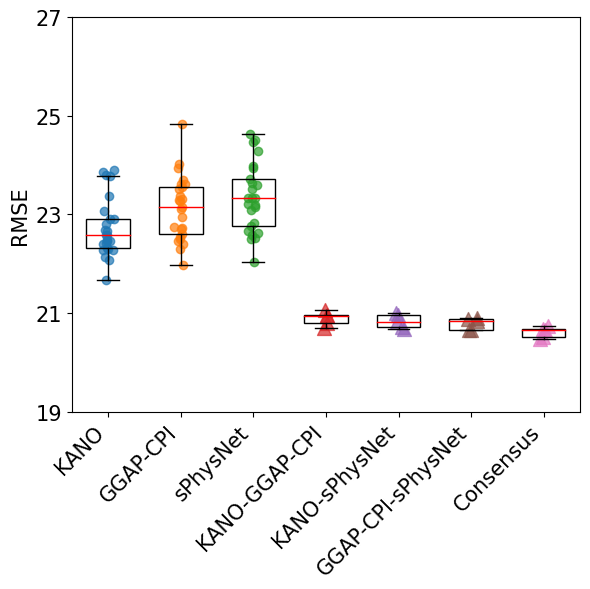

In [16]:
base_models = {
    'KANO': [x[2] for x in kano_collect_],
    'GGAP-CPI': [x[2] for x in ggap_collect_],
    'sPhysNet': [x[2] for x in sphys_collect_]
}
ensemble_models = {
    'KANO-GGAP-CPI': [x[2] for x in kano_ggap_collect],
    'KANO-sPhysNet': [x[2] for x in kano_sphys_collect],
    'GGAP-CPI-sPhysNet': [x[2] for x in ggap_sphys_collect],
    'Consensus': [x[2] for x in kano_ggap_sphys_collect]
}
plot_rmse_comparison(base_models, ensemble_models)

In [17]:
# calculate statistical significance of the RMSE difference between base models and ensemble models
from scipy.stats import ttest_rel

ggap_collect_rmse = [x[2] for x in ggap_collect]
kano_collect_rmse = [x[2] for x in kano_collect]
sphys_collect_rmse = [x[2] for x in sphys_collect]
kano_ggap_collect_rmse = [x[2] for x in kano_ggap_collect]
kano_sphys_collect_rmse = [x[2] for x in kano_sphys_collect]
ggap_sphys_collect_rmse = [x[2] for x in ggap_sphys_collect]
ensemb_rmse = [x[2] for x in kano_ggap_sphys_collect]

model_names = ['KANO', 'GGAP-CPI', 'sPhysNet', 
               'KANO+GGAP-CPI', 'KANO+sPhysNet', 'GGAP-CPI+sPhysNet', 'Consensus']
results = [kano_collect_rmse, ggap_collect_rmse, sphys_collect_rmse, 
           kano_ggap_collect_rmse, kano_sphys_collect_rmse, ggap_sphys_collect_rmse, ensemb_rmse]
stat_data = []
for pair1 in range(7):
    for pair2 in range(7):
        if pair1 == pair2:
            continue
        # organize the results to dataframe
        model1 = model_names[pair1]
        model2 = model_names[pair2]
        result1 = results[pair1]
        result2 = results[pair2]
        t, p = ttest_rel(result1, result2)
        # t2, p2 = permutation_t_test(result1, result2, n_permutations=1000, random_state=0)
        # w, p_w = wilcoxon(result1, result2)
        stat_data.append([model1, model2, t, p])
stat_df = pd.DataFrame(stat_data, columns=['Model1', 'Model2', 'T', 'P'])

# convert to pairwise matrix
stat_matrix = np.zeros((7, 7))
for i, row in stat_df.iterrows():
    model1 = model_names.index(row['Model1'])
    model2 = model_names.index(row['Model2'])
    stat_matrix[model1, model2] = row['P']
    stat_matrix[model2, model1] = row['P']
stat_matrix = pd.DataFrame(stat_matrix, columns=model_names, index=model_names)
stat_matrix

,KANO,GGAP-CPI,sPhysNet,KANO+GGAP-CPI,KANO+sPhysNet,GGAP-CPI+sPhysNet,Consensus
KANO,0.000000,0.743575,0.054475,0.000737,0.001476,0.001944,0.000285
GGAP-CPI,0.743575,0.000000,0.048380,0.000052,0.001622,0.000272,0.000062
sPhysNet,0.054475,0.048380,0.000000,0.001686,0.000061,0.000046,0.000077
KANO+GGAP-CPI,0.000737,0.000052,0.001686,0.000000,0.486509,0.175988,0.003899
KANO+sPhysNet,0.001476,0.001622,0.000061,0.486509,0.000000,0.282793,0.002847
GGAP-CPI+sPhysNet,0.001944,0.000272,0.000046,0.175988,0.282793,0.000000,0.002156
Consensus,0.000285,0.000062,0.000077,0.003899,0.002847,0.002156,0.000000


In [18]:
# for any base model and two-component ensemble model,
# show number of folds where the ensemble model is better than the base model
better_count = np.zeros((7, 7))
for i, result1 in enumerate(results):
    for j, result2 in enumerate(results):
        if i == j:
            continue
        for k in range(5):
            if result1[k] < result2[k]:
                better_count[i, j] += 1
better_count = pd.DataFrame(better_count, columns=model_names, index=model_names)
better_count

,KANO,GGAP-CPI,sPhysNet,KANO+GGAP-CPI,KANO+sPhysNet,GGAP-CPI+sPhysNet,Consensus
KANO,0.0,2.0,4.0,0.0,0.0,0.0,0.0
GGAP-CPI,3.0,0.0,5.0,0.0,0.0,0.0,0.0
sPhysNet,1.0,0.0,0.0,0.0,0.0,0.0,0.0
KANO+GGAP-CPI,5.0,5.0,5.0,0.0,2.0,1.0,0.0
KANO+sPhysNet,5.0,5.0,5.0,3.0,0.0,1.0,0.0
GGAP-CPI+sPhysNet,5.0,5.0,5.0,4.0,4.0,0.0,0.0
Consensus,5.0,5.0,5.0,5.0,5.0,5.0,0.0


In [19]:
# for the final results of the ensemble model
ggap = yaowen[[f'Prediction_{i}_{j}' for i in range(5) for j in range(5)]].values
kano = weijun[[f'Prediction_{j}_{i}' for i in range(5) for j in range(5)]].values
sphysnet = xiaolin[[f'Prediction_{j}_{i}' for i in range(5) for j in range(5)]].values
ggap_kano = np.nanmean(np.hstack((ggap, kano)), axis=1)
ggap_sphys = np.nanmean(np.hstack((ggap, sphysnet)), axis=1)
kano_sphys = np.nanmean(np.hstack((kano, sphysnet)), axis=1)
kano_ggap_sphys = np.nanmean(np.hstack((ggap, kano, sphysnet)), axis=1)

r2, rmse, mae, pcc = calc_score(label, ggap_kano)
print(f'KANO+GGAP: R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}, PCC={pcc:.3f}')
r2, rmse, mae, pcc = calc_score(label, kano_sphys)
print(f'KANO+sPhysNet: R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}, PCC={pcc:.3f}')
r2, rmse, mae, pcc = calc_score(label, ggap_sphys)
print(f'GGAP+sPhysNet: R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}, PCC={pcc:.3f}')
r2, rmse, mae, pcc = calc_score(label, kano_ggap_sphys)
print(f'Consensus: R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}, PCC={pcc:.3f}')

KANO+GGAP: R2=0.661, RMSE=20.819, MAE=15.363, PCC=0.814
KANO+sPhysNet: R2=0.663, RMSE=20.758, MAE=15.617, PCC=0.817
GGAP+sPhysNet: R2=0.665, RMSE=20.698, MAE=15.250, PCC=0.818
Consensus: R2=0.670, RMSE=20.555, MAE=15.225, PCC=0.820
